# **Importing the MNIST dataset from kaggle into colab notebook**

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"namanvermaml","key":"aa45c5308e974312732e692aae3966ce"}'}

In [ ]:
# Create a kaggle folder
!mkdir -p ~/.kaggle

In [ ]:
# Copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
# Permission for the json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# To list all datasets in kaggle
!kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                          Student Performance Factors                          94KB  2024-09-02 10:53:57           5642        125  1.0              
hanaksoy/customer-purchasing-behaviors                           Customer Purchasing Behaviors                         1KB  2024-09-01 22:18:07           3449         47  1.0              
haseebindata/student-performance-predictions                     Student Performance Predictions                       9KB  2024-08-17 06:57:57          11484        243  0.9411765        
computingvictor/2024-academic-ranking-of-world-universi

In [ ]:
!kaggle datasets download -d oddrationale/mnist-in-csv

Dataset URL: https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
License(s): CC0-1.0
 85% 13.0M/15.2M [00:01<00:00, 21.0MB/s]
100% 15.2M/15.2M [00:01<00:00, 14.3MB/s]


In [ ]:
# unzipping the imported zip file
!unzip mnist-in-csv.zip

Archive:  mnist-in-csv.zip
  inflating: mnist_test.csv          
  inflating: mnist_train.csv         


## **Importing all the necessary libraries in the notebook**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df=pd.read_csv('mnist_train.csv')
df

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0          5    0    0    0    0    0    0    0    0    0  ...      0      0   
1          0    0    0    0    0    0    0    0    0    0  ...      0      0   
2          4    0    0    0    0    0    0    0    0    0  ...      0      0   
3          1    0    0    0    0    0    0    0    0    0  ...      0      0   
4          9    0    0    0    0    0    0    0    0    0  ...      0      0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   
59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   
59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   
59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   
59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   

       28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0          0      0      0      0      0      0      0      0  
1          0      0      0      0      0      0      0      0  
2          0      0      0      0      0      0      0      0  
3          0      0      0      0      0      0      0      0  
4          0      0      0      0      0      0      0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
59995      0      0      0      0      0      0      0      0  
59996      0      0      0      0      0      0      0      0  
59997      0      0      0      0      0      0      0      0  
59998      0      0      0      0      0      0      0      0  
59999      0      0      0      0      0      0      0      0  

[60000 rows x 785 columns]

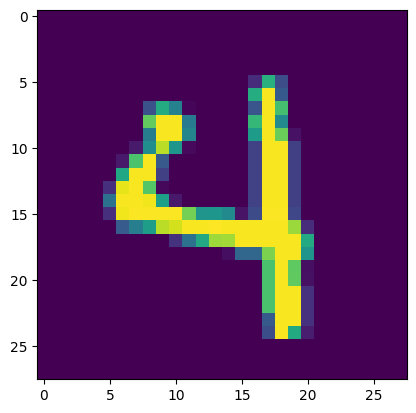

In [ ]:
# Display an image from the dataset
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

In [ ]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Comparing the impact of applying PCA: before vs after**

## **After applying PCA on knn classifier**

---



In [ ]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
import time
start=time.time()
y_pred=knn.predict(x_test)
print("Time taken by knn classifier to predict the number: ", time.time()-start)

Time taken by knn classifier to predict the number:  60.76196479797363


In [ ]:
accuracy_score(y_test,y_pred)

0.9715

## **After applying PCA on knn classifier**

---

In [ ]:
# Centralizing the data to the mean
from sklearn.preprocessing import StandardScaler #Fixed typo standardscaler to StandardScaler
scaler=StandardScaler()

x_train_trf=scaler.fit_transform(x_train)
x_test_trf=scaler.transform(x_test)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=100)

x_train_pca=pca.fit_transform(x_train_trf)
x_test_pca=pca.transform(x_test_trf)

In [ ]:
x_train_pca.shape

(48000, 100)

In [ ]:
# Applying on knn
knn.fit(x_train_pca,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_pca = knn.predict(x_test_pca)

In [ ]:
accuracy_score(y_test,y_pred_pca)

0.9600833333333333

We used 100 columns instead of 784 columns and yet got 96% accuracy which is commendable

# **Calculating accuracy score using different number of columns**

In [ ]:
for i in range(1,785):
  pca=PCA(n_components=i)
  x_train_pca=pca.fit_transform(x_train_trf)
  x_test_pca=pca.transform(x_test_trf)

  knn=KNeighborsClassifier()
  knn.fit(x_train_pca,y_train)

  y_pred_pca=knn.predict(x_test_pca) # Changed x_test_trf to x_test_pca
  print(f"Accuracy score for {i} columns: {accuracy_score(y_test,y_pred_pca)}")

Accuracy score for 1 columns: 0.2629166666666667


KeyboardInterrupt: 

# **Using PCA for Vizualising the data**

---



In [ ]:
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_pca[:,0], y=x_train_pca[:,1], color=y_train_trf, color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [69]:
# Training pca for n dimensions

pca=PCA(n_components=3)

x_train_pca=pca.fit_transform(x_train_trf)
x_test_pca=pca.transform(x_test_trf)

In [73]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=x_train_pca[:,0], y=x_train_pca[:,1], z=x_train_pca[:,2], color=y_train_trf)

fig.update_layout(margin=dict(l=20, r=20, b=20))

fig.show()

# **Some useful functions of PCA**

In [70]:
# To see eigen values
pca.explained_variance_

array([40.65780534, 29.35286733, 26.72542342])

In [71]:
# To see eigen vectors
pca.components_.shape

(3, 784)

In [72]:
# To see how much percentage are they defining the variance
pca.explained_variance_ratio_

array([0.05702238, 0.04116726, 0.03748228])

In [75]:
# To find cumulative sum of percentage variance explained by eigen vectors
np.cumsum(pca.explained_variance_ratio_)

array([0.05702238, 0.09818964, 0.13567192])

In [76]:
# Fitting all columns to vizually see the cumulative sum of variance explained by eigen value

pca=PCA(n_components=784)

x_train_pca=pca.fit_transform(x_train_trf)
x_test_pca=pca.transform(x_test_trf)

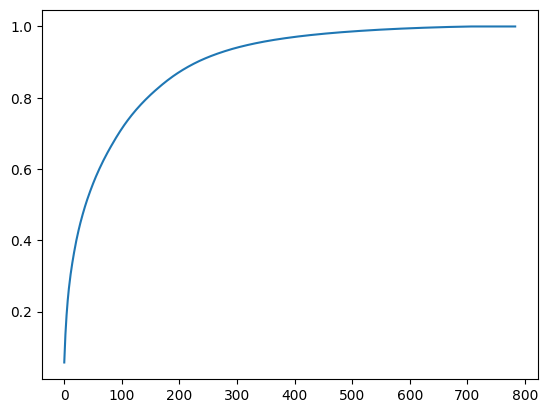

In [77]:
# Plotting the graph of cumsum

plt.plot(np.cumsum(pca.explained_variance_ratio_))